In [117]:
import numpy as np, matplotlib.pyplot as plt, scipy
from random import randint

# Assignment 4
### Section 7.1
#### (a)

In [118]:
def rand_walk(start=(0,0), steps=1000):
    data = []
    x, y = start[0],start[1]
    dx, dy = 1, 1
    for setp in range(steps):
        data.append([x,y])
        if randint(0,1) == 1: x += dx
        else: x -= dx
        if randint(0,1) == 1: y += dy
        else: y -= dy
    return np.array(data).T

(-10.85, 51.85, -32.05, 30.650000000000006)

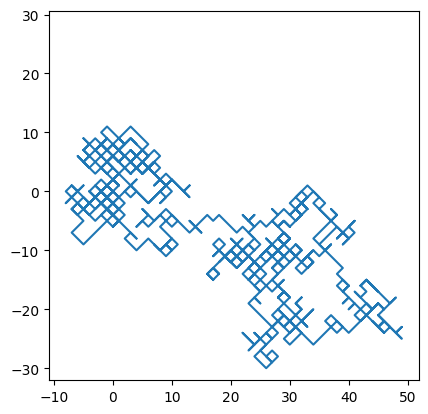

In [119]:
x,y = rand_walk()
plt.plot(x,y)
plt.axis('square')

#### (b)

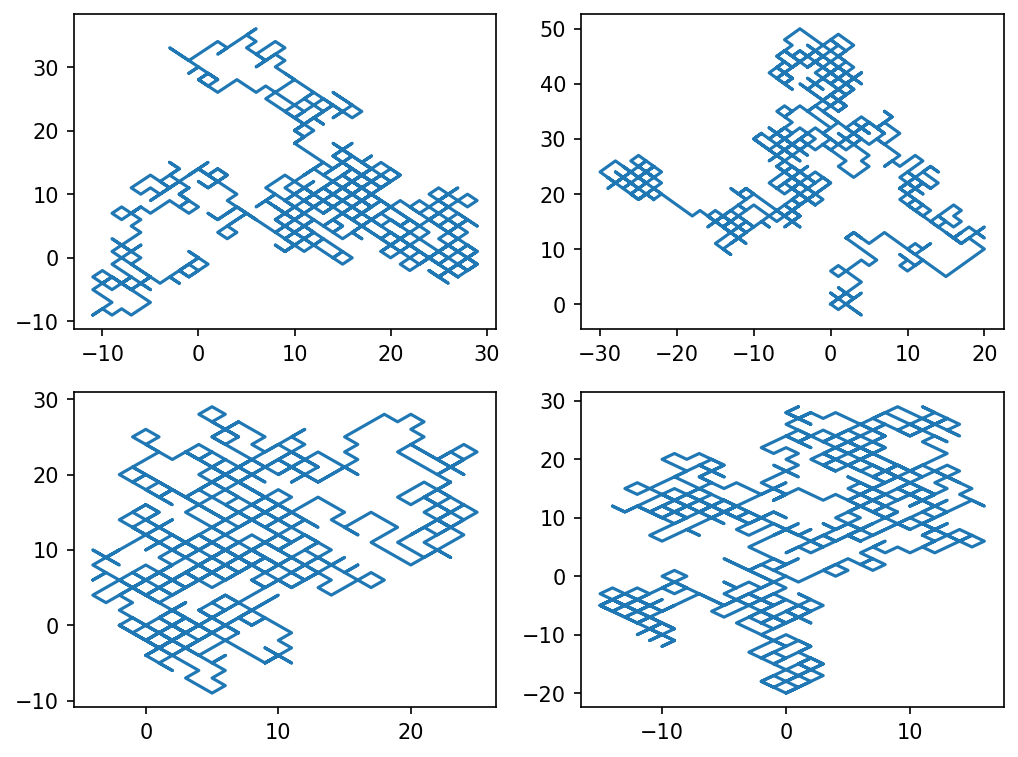

In [120]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=150)
axes_x, axes_y = [0,0,1,1,], [0,1,0,1]
for i0, (i1, i2) in enumerate(zip(axes_x,axes_y)):
    x,y = rand_walk()
    ax[i1,i2].plot(x,y,label="plot{i0}")
plt.show()

### 7.2
####  (a)

The question asks us to make one plot then also asks to plot the end points. With one plot there should be only one end point. This does not make any sense. 

In [121]:
def displacement(x,y):
    return np.sqrt(x**2+y**2)

In [122]:
N = 1000
endpoints, endpoint_distances = [], []
for i in range(N):
    x, y = rand_walk(steps=1000)
    dif = displacement(x[-1], y[-1])
    endpoints.append([x[-1], y[-1]])
    endpoint_distances.append(dif)
endpoints = np.array(endpoints).T

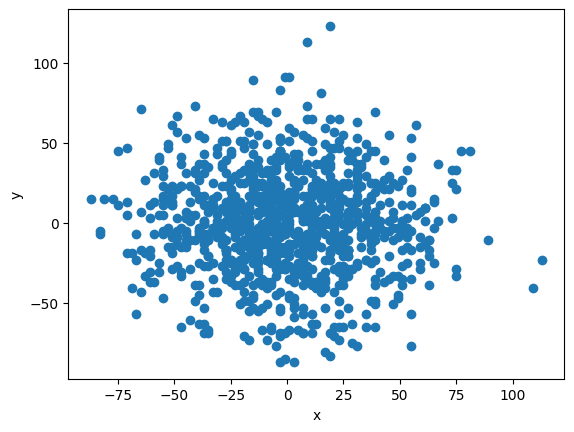

In [123]:
fig, ax = plt.subplots(1,1)
ax.scatter(endpoints[0], endpoints[1])
ax.set_xlabel("x")
ax.set_ylabel("y")
_=plt.plot()

#### (b)

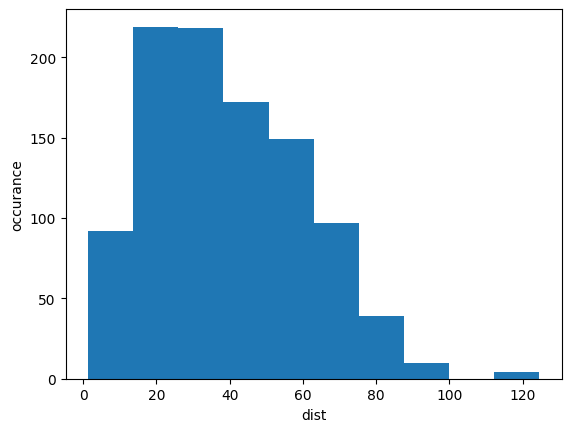

In [124]:
fig, ax = plt.subplots(1,1)
ax.hist(endpoint_distances)
ax.set_xlabel("dist")
ax.set_ylabel("occurance")
_=plt.plot()

#### (c)

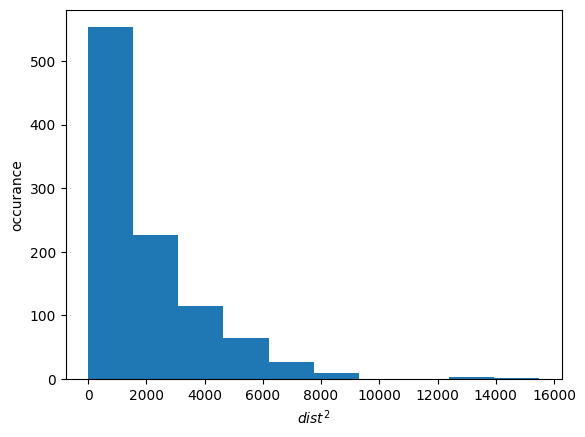

In [125]:
fig, ax = plt.subplots(1,1)
ax.hist(np.array(endpoint_distances)**2)
ax.set_xlabel("$dist^2$")
ax.set_ylabel("occurance")
_=plt.plot()

#### (d)

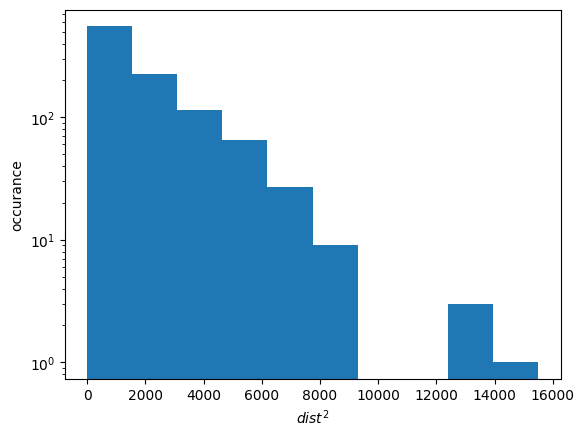

In [126]:
fig, ax = plt.subplots(1,1)
ax.hist(np.array(endpoint_distances)**2)
ax.set_xlabel("$dist^2$")
ax.set_ylabel("occurance")
ax.set_yscale('log')
_=plt.plot()

#### (e)

In [127]:
np.mean(np.array(endpoint_distances)**2)

1976.864

#### (f)

In [128]:
N = 1000
endpoints, endpoint_distances = [], []
for i in range(N):
    x, y = rand_walk(steps=4000)
    dif = displacement(x[-1], y[-1])
    endpoints.append([x[-1], y[-1]])
    endpoint_distances.append(dif)
endpoints = np.array(endpoints).T

In [129]:
np.mean(np.array(endpoint_distances)**2)

7803.04

### 7.3.1

$$
P(l) = \frac{e^{-8}\cdot8^l}{l!}
$$

In [132]:
poisson = lambda l: np.exp(-8)*(8**l)/scipy.special.factorial(l)

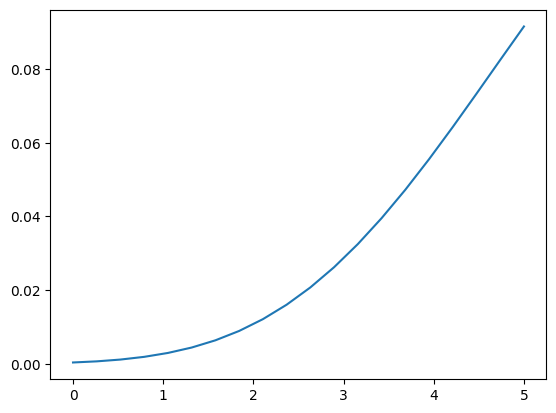

In [133]:
plt.plot(np.linspace(0,5,20), poisson(np.linspace(0,5,20)))

#### (a)

#### (b)

#### (c)

#### (d)

#### (e)

### 7.3.2

#### (a)

#### (b)

#### (c)